In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Coordinate reference system (CRS) in Geopandas

In [2]:
data = gpd.read_file('L2_data/Europe_borders.shp')

In [3]:
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
data['geometry'].head()

0    POLYGON ((8.45778 54.56236, 8.44953 54.56269, ...
1    POLYGON ((8.71992 47.69664, 8.72092 47.69530, ...
2    POLYGON ((6.73317 53.57409, 6.73017 53.57542, ...
3    POLYGON ((6.85822 53.59411, 6.85592 53.59550, ...
4    POLYGON ((6.89894 53.62561, 6.88439 53.62814, ...
Name: geometry, dtype: geometry

In [5]:
data_wgs84 = data.copy()
data = data.to_crs(epsg=3035)

In [6]:
data['geometry'].head()

0    POLYGON ((4221214.558 3496203.404, 4220681.651...
1    POLYGON ((4224860.478 2732279.320, 4224932.819...
2    POLYGON ((4104652.176 3390034.953, 4104460.401...
3    POLYGON ((4113025.664 3391895.756, 4112879.943...
4    POLYGON ((4115871.228 3395282.099, 4114921.348...
Name: geometry, dtype: geometry

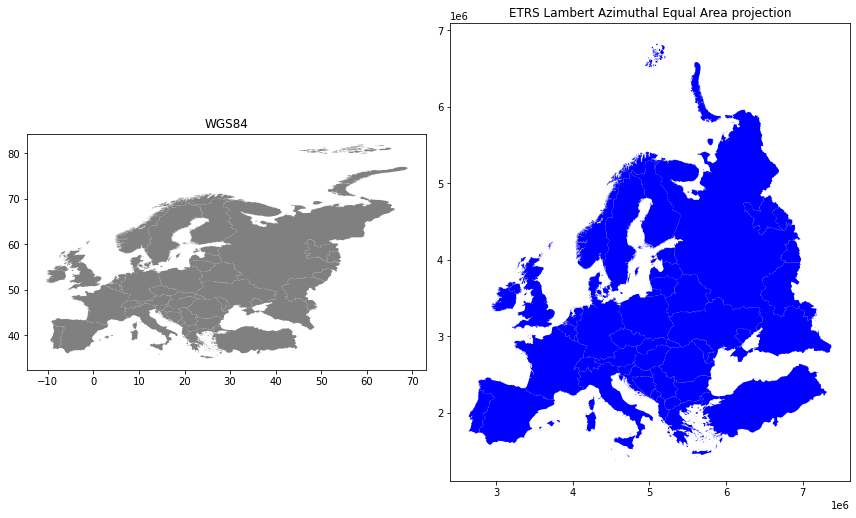

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

data_wgs84.plot(ax=ax1, facecolor='gray');
ax1.set_title("WGS84");

data.plot(ax=ax2, facecolor='blue');
ax2.set_title("ETRS Lambert Azimuthal Equal Area projection");

plt.tight_layout()

In [9]:
outfp = "L2_data/Europe_borders_epsg3035.shp"
data.to_file(outfp)

# Dealing with different CRS formats

In [12]:
crs_object = data.crs

In [13]:
print(f'Name: {crs_object.name}')
print(f'Coordinate system: {crs_object.coordinate_system}')
print(f'Bounds: {crs_object.area_of_use.bounds}')

Name: ETRS89-extended / LAEA Europe
Coordinate system: cartesian
Bounds: (-35.58, 24.6, 44.83, 84.17)


In [14]:
crs_wkt = crs_object.to_wkt()
crs_wkt

'PROJCRS["ETRS89-extended / LAEA Europe",BASEGEOGCRS["ETRS89",DATUM["European Terrestrial Reference System 1989",ELLIPSOID["GRS 1980",6378137,298.257222101,LENGTHUNIT["metre",1]]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],ID["EPSG",4258]],CONVERSION["Europe Equal Area 2001",METHOD["Lambert Azimuthal Equal Area",ID["EPSG",9820]],PARAMETER["Latitude of natural origin",52,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8801]],PARAMETER["Longitude of natural origin",10,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8802]],PARAMETER["False easting",4321000,LENGTHUNIT["metre",1],ID["EPSG",8806]],PARAMETER["False northing",3210000,LENGTHUNIT["metre",1],ID["EPSG",8807]]],CS[Cartesian,2],AXIS["northing (Y)",north,ORDER[1],LENGTHUNIT["metre",1]],AXIS["easting (X)",east,ORDER[2],LENGTHUNIT["metre",1]],USAGE[SCOPE["unknown"],AREA["Europe - LCC & LAEA"],BBOX[24.6,-35.58,84.17,44.83]],ID["EPSG",3035]]'

In [15]:
epsg = crs_object.to_epsg()
epsg

3035

In [17]:
data.crs = crs_wkt
outfp = "L2_data/Europe_borders_epsg3035.shp"
data.to_file(outfp)

# Overview of different crs formats

In [18]:
from pyproj import CRS

In [25]:
# pyproj CRS object:
crs_object = data_wgs84.crs

# EPSG code (here, the input crs information is a bit vague so we need to lower the confidence threshold)
crs_epsg = CRS(data_wgs84.crs).to_epsg(min_confidence=25)

# PROJ string
crs_proj4 = CRS(data_wgs84.crs).to_proj4()

# Well-Known Text (WKT)
crs_wkt = CRS(data_wgs84.crs).to_wkt()

<ipython-input-25-183c9af61e95>:8: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  crs_proj4 = CRS(data_wgs84.crs).to_proj4()


In [26]:
print("\nCRS object:\n", crs_object)
print("\nEPSG code: \n", crs_epsg)
print("\nPROJ string: \n", crs_proj4)
print("\nWell-Known Text (WKT):\n",crs_wkt)


CRS object:
 epsg:4326

EPSG code: 
 4326

PROJ string: 
 +proj=longlat +datum=WGS84 +no_defs +type=crs

Well-Known Text (WKT):
 GEOGCRS["WGS 84",DATUM["World Geodetic System 1984",ELLIPSOID["WGS 84",6378137,298.257223563,LENGTHUNIT["metre",1]]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],CS[ellipsoidal,2],AXIS["geodetic latitude (Lat)",north,ORDER[1],ANGLEUNIT["degree",0.0174532925199433]],AXIS["geodetic longitude (Lon)",east,ORDER[2],ANGLEUNIT["degree",0.0174532925199433]],USAGE[SCOPE["unknown"],AREA["World"],BBOX[-90,-180,90,180]],ID["EPSG",4326]]


# Global map projections

In [30]:
fp = 'L2_data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'
world_data = gpd.read_file(fp)

In [43]:
ortho = CRS.from_proj4('+proj=ortho +lat_0=-3.772 +lon_0=-38.472 +x_0=0 +y_0=0 +a=6370997 +b=6370997 +units=m +no_defs')

In [44]:
world_data_wgs84 = world_data.copy()
world_data_mercator = world_data.to_crs(epsg=3785)
world_data_orthographic = world_data.to_crs(crs=ortho)

Text(0.5, 1.0, 'WGS 84')

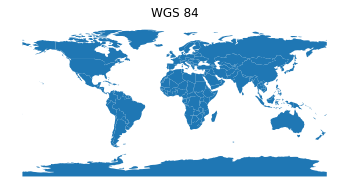

In [45]:
world_data_wgs84.plot()
plt.axis('off')
plt.title('WGS 84')

Text(0.5, 1.0, 'Mercator')

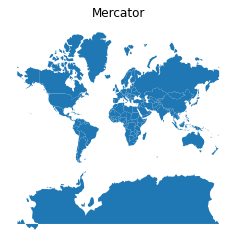

In [46]:
world_data_mercator.plot()
plt.axis('off')
plt.title('Mercator')

Text(0.5, 1.0, 'Orthographic')

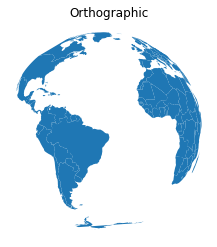

In [47]:
world_data_orthographic.plot()
plt.axis('off')
plt.title('Orthographic')